## INTRODUCTION

This notebook is the result of a Data Science project where we processed with datasets of **natural disasters occured in the area of Southeast Asia from 2000 to the early 2024**. We aimed to **reviewing** the recent circumstance of the local area in the last 2 decades, **withdrawing** valuable conclusions, **visualizing** some noteworthy parts and last but not least: **giving** some promising predictions.

## ABOUT THE DATA

We decided to approach this project by the dataset of [EM-DAT](https://www.emdat.be/). **EM-DAT** (Emergency Events Database) is a global database of disasters developed by the Center for Research on the Epidemiology of Disasters (CRED). The main objective of EM-DAT is to **record and provide comprehensive information** about major natural and man-made disasters worldwide, ranging from climate-related events (hurricanes, floods, droughts, etc.) to industrial accidents and armed conflicts.

EM-DAT is an important resource for researchers, governments, and international organizations when studying and preparing for disasters. However, it's **noteworthy** that this database records events based on criteria such as:
- At least **10 deaths** (including dead and missing).
- At least **100 people affected**.
- **International assistance** is required or an **emergency declaration** is requested from the government.
- The **level** of disasters
- And so on


## HERE'RE SOME PREPROCESSING

In [1]:
!pip install pandas numpy matplotlib seaborn os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
!apt update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]      
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]        
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:5 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1227 B]   
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://packages.cloud.google.com/apt cloud-sdk InRelease [1618 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1001 kB]
Hit:9 https://packages.cloud.google.com/apt google-fast-socket InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2318 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3113 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1156 kB]
Get:13 http://a

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import pandas_profiling as pp

In [4]:
df = pd.read_excel(r'/kaggle/input/disaster-1/disaster_sea.xlsx')
df

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0038-PHL,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,4080.0,7219.0,56.514291,"[{""adm2_code"":24275,""adm2_name"":""Agusan Del No...",2004-10-27,2023-09-25
1,2000-0066-PHL,No,nat-hyd-flo-coa,Natural,Hydrological,Flood,Coastal flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":24203,""adm2_name"":""Tawi-tawi""}]",2003-07-01,2023-09-25
2,2000-0082-IDN,No,nat-hyd-mmw-mud,Natural,Hydrological,Mass movement (wet),Mudslide,NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,11600.0,20526.0,56.514291,"[{""adm2_code"":18035,""adm2_name"":""Brebes""}]",2005-07-21,2023-09-25
3,2000-0089-PHL,No,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mt. Mayon,PHL,...,NaN,NaN,NaN,NaN,2214.0,3918.0,56.514291,"[{""adm2_code"":24240,""adm2_name"":""Albay""}]",2005-06-01,2023-09-25
4,2000-0108-IDN,No,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Dengue fever,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,2024-0479-VNM,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-15,2024-07-17
1274,2024-0522-PHL,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,GLIDE:TC-2024-000127,Typhoon 'Gaemi' (Carina),PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-25,2024-08-08
1275,2024-0628-THA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,THA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-22,2024-08-26
1276,2024-0643-LAO,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),GLIDE:FF-2024-000156,NaN,LAO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-26,2024-08-26


Here're **descriptions and detailed explanations** of every column attributes we are about to approach.

In [5]:
from IPython.display import display
# Hiển thị toàn bộ nội dung của cột
pd.set_option('display.max_colwidth', None)  

df_info = pd.read_csv('/kaggle/input/disaster-1/attributes.csv')
df_info

,Column name,Description,Explanation
0,Dis No.,"A unique 8-digit identifier including the year (4 digits) and a sequential number (4 digits) for each disaster event (i.e., 2004-0659). In the EM-DAT Public Table, the ISO country code is appended.","Dis No.: A unique 8-digit identifier including the year (4 digits) and a sequential number (4 digits) for each disaster event (i.e., 2004-0659). In the EM-DAT Public Table, the ISO country code is appended.;"
1,Historic,"Binary field specifying whether or not the disaster happened before 2000, using the Start Year. Data before 2000 should be considered of lesser quality","Historic: Binary field specifying whether or not the disaster happened before 2000, using the Start Year. Data before 2000 should be considered of lesser quality;"
2,Classification Key,"A unique 15-character string identifying disasters in terms of the Group, Subgroup, Type and Subtype classification hierarchy.","Classification Key: A unique 15-character string identifying disasters in terms of the Group, Subgroup, Type and Subtype classification hierarchy.;"
3,Disaster Group,"The disaster group, i.e., “Natural” or “Technological.”","Disaster Group: The disaster group, i.e., “Natural” or “Technological.”;"
4,Disaster Subgroup,The disaster subgroup.,Disaster Subgroup: The disaster subgroup.;
5,Disaster Type,The disaster type.,Disaster Type: The disaster type.;
6,Disaster Subtype,The disaster subtype.,Disaster Subtype: The disaster subtype.;
7,External IDs,"List of identifiers for external resources (GLIDE, USGS, DFO), in the format “<source>:<identifier>” and separated by the pipe character (""|"").","External IDs: List of identifiers for external resources (GLIDE, USGS, DFO), in the format “<source>:<identifier>” and separated by the pipe character (""|"").;"
8,Event Name,"Short specification for disaster identification, e.g., storm names (e.g., “Mitch”), plane type in air crash (e.g., “Boeing 707”), disease name (e.g., “Cholera”), or volcano name (e.g., “Etna”).","Event Name: Short specification for disaster identification, e.g., storm names (e.g., “Mitch”), plane type in air crash (e.g., “Boeing 707”), disease name (e.g., “Cholera”), or volcano name (e.g., “Etna”).;"
9,ISO,The International Organization for Standardization (ISO) 3-letter code referring to the Country. The ISO 3166 norm is used.,ISO: The International Organization for Standardization (ISO) 3-letter code referring to the Country. The ISO 3166 norm is used.;


In [6]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

We classify the types of disaster by theirs uniqueness like below. It can be seen that natural disasters are diverse in Southeast Asia, as 10 types were defined.

In [7]:
df['Disaster Type'].unique()

array(['Flood', 'Mass movement (wet)', 'Volcanic activity', 'Epidemic',
       'Wildfire', 'Earthquake', 'Storm', 'Mass movement (dry)',
       'Drought', 'Extreme temperature'], dtype=object)

In [8]:
len(df['Disaster Type'].unique())

10

Referring to the subjects of this studies, 10 of 11 countries in the area were being working on. **The only country that is out of the survey is Brunei**, due to the **short range of the project** (2000 - 2024)

In [9]:
df['Country'].unique()

array(['Philippines', 'Indonesia', 'Malaysia', 'Viet Nam',
       "Lao People's Democratic Republic", 'Thailand', 'Cambodia',
       'Singapore', 'Timor-Leste', 'Myanmar'], dtype=object)

In [10]:
len(df['Country'].unique())

10

In [11]:
df.groupby('Country')['ISO'].unique()

Country
Cambodia                            [KHM]
Indonesia                           [IDN]
Lao People's Democratic Republic    [LAO]
Malaysia                            [MYS]
Myanmar                             [MMR]
Philippines                         [PHL]
Singapore                           [SGP]
Thailand                            [THA]
Timor-Leste                         [TLS]
Viet Nam                            [VNM]
Name: ISO, dtype: object

Although the more attributes we poccess, the more accurate and objective the outcome will be, we are not going to process with all of these criteria. The reasons are shown below:

In [12]:
df.isnull().sum()

DisNo.                                          0
Historic                                        0
Classification Key                              0
Disaster Group                                  0
Disaster Subgroup                               0
Disaster Type                                   0
Disaster Subtype                                0
External IDs                                  992
Event Name                                    898
ISO                                             0
Country                                         0
Subregion                                       0
Region                                          0
Location                                       23
Origin                                        709
Associated Types                              799
OFDA/BHA Response                               0
Appeal                                          0
Declaration                                     0
AID Contribution ('000 US$)                  1194


We can clearly witness the **lack of informations** from several attributes. As the dataset is ranged from 2000-2024, it can not be biasly stated that the period of time affected the loss of data. Therefore, we **decided to eliminate some columns** from the survey. But don't need to worry becauuse a vital criterion to delete an attribute is that:
- This attribute's absent does not **consequently affect the final result**.
- The **aim of the project is secured**.

In [13]:
#df = df.drop(columns=['Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup', 
#                      'Disaster Subtype', 'Disaster Subsubtype', 'Region', 
#                      'Continent', 'Origin', 'Associated Dis', 'Associated Dis2', 
#                      'Appeal', 'Declaration', 'Aid Contribution', 'Latitude', 
#                      'Longitude', 'Local Time', 'River Basin', 'Start Year', 
#                      'No Affected', 'Reconstruction Costs (\'000 US$)', 
#                      'Reconstruction Costs, Adjusted (\'000 US$)', 
#                      'Insured Damages (\'000 US$)', 
#                      'Insured Damages, Adjusted (\'000 US$)', 'CPI', 
#                      'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'])


In [14]:
df1 = df.sort_values('Start Year', ascending= True).reset_index(drop=True)
pd.reset_option('display.max_colwidth') 
df1

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0038-PHL,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,4080.0,7219.0,56.514291,"[{""adm2_code"":24275,""adm2_name"":""Agusan Del No...",2004-10-27,2023-09-25
1,2000-0066-PHL,No,nat-hyd-flo-coa,Natural,Hydrological,Flood,Coastal flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":24203,""adm2_name"":""Tawi-tawi""}]",2003-07-01,2023-09-25
2,2000-0082-IDN,No,nat-hyd-mmw-mud,Natural,Hydrological,Mass movement (wet),Mudslide,NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,11600.0,20526.0,56.514291,"[{""adm2_code"":18035,""adm2_name"":""Brebes""}]",2005-07-21,2023-09-25
3,2000-0089-PHL,No,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mt. Mayon,PHL,...,NaN,NaN,NaN,NaN,2214.0,3918.0,56.514291,"[{""adm2_code"":24240,""adm2_name"":""Albay""}]",2005-06-01,2023-09-25
4,2000-0108-IDN,No,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Dengue fever,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,2024-0106-THA,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,THA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-27,2024-02-29
1274,2024-0130-IDN,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,25000.0,NaN,NaN,NaN,2024-03-12,2024-05-02
1275,2024-0154-IDN,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,35000.0,NaN,NaN,NaN,2024-03-27,2024-05-02
1276,2024-0204-IDN,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-09,2024-04-16


In [15]:
df1.loc[(df['Disaster Type'] == 'Earthquake') | (df['Disaster Type'] == 'Flood') | (df['Disaster Type'] == 'Storm')]

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0038-PHL,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,4080.0,7219.0,56.514291,"[{""adm2_code"":24275,""adm2_name"":""Agusan Del No...",2004-10-27,2023-09-25
1,2000-0066-PHL,No,nat-hyd-flo-coa,Natural,Hydrological,Flood,Coastal flood,NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":24203,""adm2_name"":""Tawi-tawi""}]",2003-07-01,2023-09-25
7,2000-0763-PHL,No,nat-geo-mmd-lan,Natural,Geophysical,Mass movement (dry),Landslide (dry),NaN,NaN,PHL,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":24205,""adm2_name"":""Apayao""},{""ad...",2014-07-11,2023-09-25
8,2000-0770-IDN,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,34000.0,60162.0,56.514291,"[{""adm1_code"":1518,""adm1_name"":""Jambi""},{""adm1...",2005-04-24,2023-09-25
9,2000-0774-MYS,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,MYS,...,NaN,NaN,NaN,NaN,1000.0,1769.0,56.514291,"[{""adm2_code"":37347,""adm2_name"":""Kota Setar""},...",2005-09-14,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2024-0643-LAO,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),GLIDE:FF-2024-000156,NaN,LAO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-26,2024-08-26
1272,2024-0101-IDN,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-27,2024-04-16
1274,2024-0130-IDN,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,25000.0,NaN,NaN,NaN,2024-03-12,2024-05-02
1275,2024-0154-IDN,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,35000.0,NaN,NaN,NaN,2024-03-27,2024-05-02


In [16]:
result = df1.groupby('Country').agg(
    Total_Disasters=('DisNo.', 'count'), 
    Total_Damages=('Total Damage (\'000 US$)', 'sum')
).reset_index()

# Rearrange descendedly
result_sorted = result.sort_values(by='Total_Disasters', ascending=False)

# Show sorted dataframe
print(result_sorted)

                            Country  Total_Disasters  Total_Damages
1                         Indonesia              392    23486517.00
5                       Philippines              368    24243576.92
9                          Viet Nam              186    20782639.00
7                          Thailand              119    48820774.00
3                          Malaysia               77     3386042.00
4                           Myanmar               56     6939758.00
0                          Cambodia               34     1407100.00
2  Lao People's Democratic Republic               30      464889.00
8                       Timor-Leste               14       24000.00
6                         Singapore                2           0.00


Based on the data presented in the table, the following points can be observed:

- **Indonesia and the Philippines have the highest number of disasters**: Indonesia leads with 392 disasters and 23.486 billion USD in damages, followed by the Philippines with 368 disasters and 24.243 billion USD in damages. Despite having fewer disasters, the Philippines experiences greater financial losses due to large-scale typhoons.

- **Vietnam experiences a significant number of disasters**: Vietnam recorded 186 disasters with total damages amounting to 20.782 billion USD, largely attributed to frequent storms and floods.

- **Thailand experiences the highest financial losses**: Thailand has only 119 disasters but suffered the most financially, with 48.821 billion USD in damages, likely due to specific catastrophic events like the 2011 floods.

- **Malaysia, Myanmar, and smaller countries have fewer disasters**: Malaysia recorded 77 disasters with 3.386 billion USD in damages, while Myanmar experienced 56 disasters, incurring 6.940 billion USD in losses. Smaller countries like Cambodia, Laos, and Timor-Leste have considerably lower disaster counts and damages.

- **Singapore reports no significant damage**: With only 2 disasters and no recorded financial losses, Singapore appears to have either effective disaster management or geographic advantages.


In [17]:
df1.loc[(df1['ISO'] == 'VNM')]

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
19,2000-0748-VNM,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,15000.0,26542.0,56.514291,"[{""adm1_code"":3333,""adm1_name"":""Binh Dinh""},{""...",2004-10-19,2023-09-25
23,2000-0542-VNM,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":32268,""adm2_name"":""Tran Van Thoi""}]",2003-07-01,2023-09-25
24,2000-0582-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Wukong,VNM,...,NaN,NaN,NaN,NaN,21000.0,37159.0,56.514291,"[{""adm2_code"":32346,""adm2_name"":""Cam Xuyen""},{...",2003-07-01,2023-09-25
28,2000-0680-VNM,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":74143,""adm2_name"":""Sin Ho""}]",2003-07-01,2023-09-25
32,2000-0439-VNM,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":32444,""adm2_name"":""Sa Pa""}]",2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,2024-0358-VNM,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-12,2024-06-14
1253,2024-0479-VNM,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-15,2024-07-17
1256,2024-0272-VNM,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-02,2024-05-03
1258,2024-9277-VNM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,10000.0,NaN,NaN,NaN,2024-05-03,2024-08-12


In [18]:
df1.loc[(df1['ISO'] == 'VNM') & (df1['Disaster Type'] == 'Storm') & (df1['Start Year'] >= 2020)]

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
999,2020-0307-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Sinlaku',VNM,...,NaN,NaN,NaN,NaN,232.0,273.0,84.939198,"[{""adm1_code"":3353,""adm1_name"":""Hoa Binh""},{""a...",2020-12-14,2023-09-25
1006,2020-0165-VNM,No,nat-met-sto-lig,Natural,Meteorological,Storm,Lightning/Thunderstorms,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,84.939198,"[{""adm1_code"":3345,""adm1_name"":""Ha Giang""},{""a...",2020-05-06,2023-09-25
1011,2020-0470-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Typhoon 'Molave' (Quinta),VNM,...,NaN,NaN,NaN,NaN,540000.0,635749.0,84.939198,"[{""adm1_code"":3372,""adm1_name"":""Quang Nam""}]",2020-11-04,2023-09-25
1016,2020-0462-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Noul' (Leon),VNM,...,NaN,NaN,NaN,NaN,33000.0,38851.0,84.939198,"[{""adm1_code"":3340,""adm1_name"":""Da Nang City""}]",2020-10-21,2023-09-25
1022,2020-0501-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,GLIDE:TC-2020-000225,Tyhoon 'Ulysses' (Vamco),VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,84.939198,"[{""adm1_code"":3349,""adm1_name"":""Ha Tinh""},{""ad...",2020-11-24,2023-09-25
1025,2020-0411-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,GLIDE:FL-2020-000211,Tropical storm Linfa,VNM,...,NaN,NaN,NaN,NaN,850000.0,1000716.0,84.939198,"[{""adm1_code"":3333,""adm1_name"":""Binh Dinh""},{""...",2020-10-13,2023-09-25
1027,2020-0425-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Nangka' (Nika),VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,84.939198,"[{""adm1_code"":3364,""adm1_name"":""Nam Dinh""},{""a...",2020-12-14,2023-09-25
1031,2020-0558-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical depression 'Vicky' (Krovanh),VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,84.939198,NaN,2020-12-23,2023-09-25
1035,2020-0088-VNM,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,DFO:4888,NaN,VNM,...,NaN,NaN,NaN,NaN,1500.0,1766.0,84.939198,"[{""adm1_code"":3338,""adm1_name"":""Cao Bang""},{""a...",2020-03-09,2024-04-12
1056,2020-0542-VNM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Etau' (Tonyo),VNM,...,NaN,NaN,NaN,NaN,5260.0,6193.0,84.939198,"[{""adm1_code"":3333,""adm1_name"":""Binh Dinh""},{""...",2020-12-10,2023-09-25


In [19]:
# Filter the country to Viet Nam
vietnam_data = df[df['Country'] == 'Viet Nam']

# Re-group base on Start Year and Disaster Type
disaster_counts = vietnam_data.groupby(['Start Year', 'Disaster Type']).size().unstack(fill_value=0)

# Rename Axí
disaster_counts = disaster_counts.rename_axis(None, axis=1)
disaster_counts.reset_index(inplace=True)

# Show the dataframe
print(disaster_counts)

    Start Year  Drought  Epidemic  Flood  Mass movement (wet)  Storm  Wildfire
0         2000        0         0      2                    2      7         0
1         2001        0         0      4                    0      3         0
2         2002        1         0      3                    0      1         1
3         2003        0         1      3                    0      1         0
4         2004        0         0      3                    1      2         0
5         2005        1         1      5                    0      4         0
6         2006        0         0      5                    0      6         0
7         2007        0         1      5                    0      1         0
8         2008        0         0      5                    0      5         0
9         2009        0         0      2                    1      3         0
10        2010        0         0      4                    0      3         0
11        2011        0         0      3            

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np

# data processing for preparation
X = np.array(disaster_counts['Start Year']).reshape(-1, 1)  
y = disaster_counts['Storm'].values 

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán cho các năm tiếp theo
future_years = np.array([[2024], [2025], [2026], [2027]])  
predictions = model.predict(future_years)

# Hiển thị kết quả
for year, prediction in zip(future_years.flatten(), predictions):
    print(f'Predicted number of storms in {year}: {int(prediction)}')


Predicted number of storms in 2024: 3
Predicted number of storms in 2025: 3
Predicted number of storms in 2026: 3
Predicted number of storms in 2027: 3


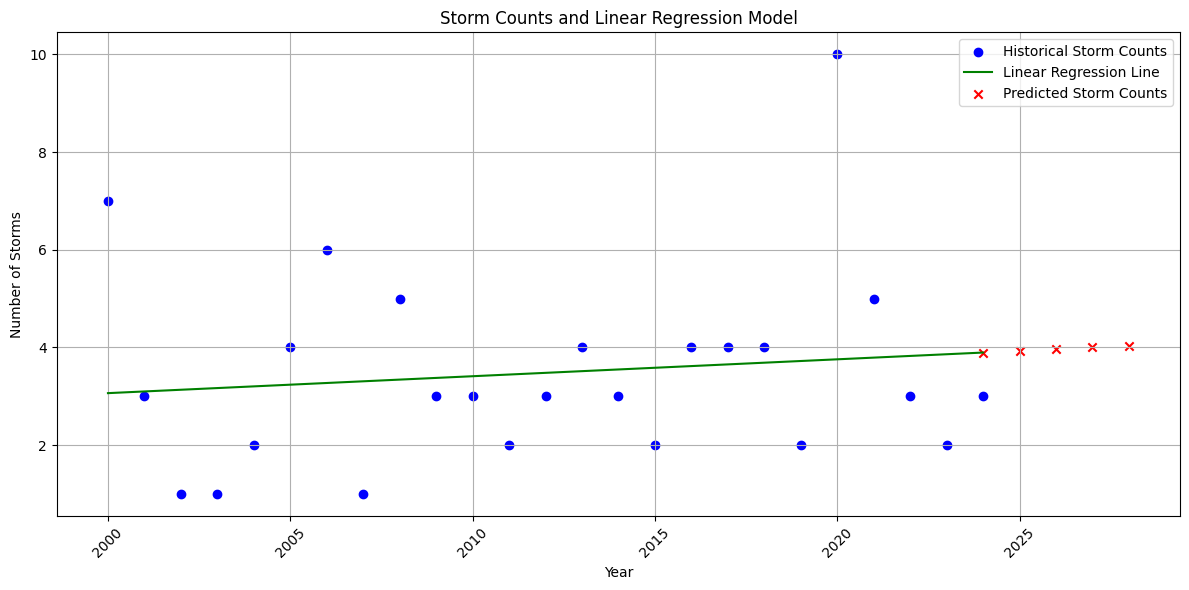

Predicted number of storms in 2024: 3
Predicted number of storms in 2025: 3
Predicted number of storms in 2026: 3
Predicted number of storms in 2027: 3
Predicted number of storms in 2028: 4


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter the country
vietnam_data = df[df['Country'] == 'Viet Nam']

# Group the following attributes
disaster_counts = vietnam_data.groupby(['Start Year', 'Disaster Type']).size().unstack(fill_value=0)

# Choose a type of disaster to be modelized
storm_counts = disaster_counts['Storm']

# Data preprocessing for LR 
X = storm_counts.index.values.reshape(-1, 1) 
y = storm_counts.values 

# Create a Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Set the years to be predicted
future_years = np.array([[2024], [2025], [2026], [2027], [2028]])  # Can be re-adjusted here
predictions = model.predict(future_years)

# Visualize Linear Regression Model
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Historical Storm Counts')
plt.plot(X, model.predict(X), color='green', label='Linear Regression Line')
plt.scatter(future_years, predictions, color='red', label='Predicted Storm Counts', marker='x')
plt.title('Storm Counts and Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show prediction
for year, prediction in zip(future_years.flatten(), predictions):
    print(f'Predicted number of storms in {year}: {int(prediction)}')

In fact, there are **approximately 10 or more storms anually** in Viet Nam. However, the database of EM-DAT only presented the **high-level disasters**. In particular, we believe the level of storms have to reach **at least 6 or 7** to be shown in the dataset. We also present to you **a scale of storm's level** as below.

In [22]:
from IPython.display import display
# show the full content of a cell
pd.set_option('display.max_colwidth', None)  

df_scale = pd.read_csv('/kaggle/input/disaster-scale/level_storm_scale.csv')
df_scale

,Level,Storm Name,Wind Speed (km/h),Consequences
0,0,NaN,< 1,Light wind.
1,1,NaN,> 1 - 5,No danger.
2,2,NaN,6 - 11,No danger.
3,3,NaN,12 - 19,NaN
4,4,NaN,20 - 28,"Small trees begin to sway, impacts on drying crops."
5,5,Low Pressure Zone,29 - 38,"Slightly rough sea. Fishing boats start to tilt, sails may need to be shortened."
6,6,Tropical Depression,39 - 49,Trees shake. Difficult to walk against the wind. Rough seas.
7,7,NaN,50 - 61,Dangerous for boats.
8,8,Storm,62 - 74,"Wind breaks tree branches, blows off roofs, damages homes. Impossible to walk against the wind."
9,9,NaN,75 - 88,Very rough seas. Extremely dangerous for boats.
